# US Accidents Exploratory Data Analysis
##### Source - Kaggle
##### What it contains - Information about accidents in US
##### How can it be useful - Can be useful to prevent accidents

## Download Dataset

In [ ]:
pip install opendatasets --upgrade --quiet

In [1]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [2]:
data_file_path = './us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preparation & Cleaning
##### 1. Installing and importing some libraries
##### 2. Load the file using pandas
##### 3. Look at data and column information
##### 4. Fixing data (incorrect or missing values)

In [ ]:
pip install pandas
pip install matplotlib
pip install seaborn
pip install folium

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [4]:
df = pd.read_csv(data_file_path)

In [5]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

##### Percentage of missing vales per column

In [51]:
missing_values_percentage = (df.isna().sum().sort_values(ascending=False) / len(df)) * 100
missing_values_percentage

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

<AxesSubplot:>

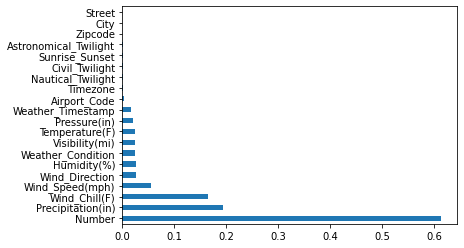

In [10]:
missing_values_percentage[missing_values_percentage!= 0].plot(kind='barh')

## Exploratory Analysis & Visualization
### Columns we'll analyze
##### 1. City
##### 2. Start Time
##### 3. Weather Condition
##### 4. Start Latitude, Start Longitude

In [11]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### City

In [55]:
cities = df.City.unique()
len(cities)

11682

In [13]:
cities_accident_count = df.City.value_counts()
cities_accident_count[:50]

Miami              106966
Los Angeles         68956
Orlando             54691
Dallas              41979
Houston             39448
Charlotte           33152
Sacramento          32559
San Diego           26627
Raleigh             22840
Minneapolis         22768
Portland            20944
Nashville           20267
Austin              18301
Baton Rouge         18182
Phoenix             17143
Saint Paul          16869
New Orleans         16251
Atlanta             15622
Jacksonville        14967
Richmond            14349
Tucson              13799
San Jose            13377
Riverside           13310
Kansas City         13298
Bakersfield         12044
San Bernardino      11249
Chicago             11188
Tampa               10984
Salt Lake City      10709
Ontario             10538
Anaheim             10502
Hialeah             10398
Fort Lauderdale     10345
Oakland             10051
Columbia             9885
Corona               9763
Washington           9624
Bronx                9453
Rochester   

#### Top 25 cities with accident count

<AxesSubplot:>

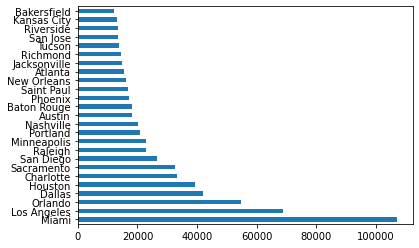

In [14]:
cities_accident_count[:25].plot(kind='barh')

In [15]:
sns.set_style('darkgrid')

In [16]:
cities_accident_count

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

<AxesSubplot:xlabel='City', ylabel='Count'>

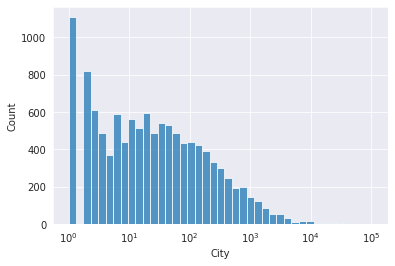

In [17]:
sns.histplot(cities_accident_count, log_scale=True)

In [18]:
cities_accident_count[cities_accident_count == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

In [19]:
high_accident_cities = cities_accident_count[cities_accident_count >= 1500]
low_accident_cities = cities_accident_count[cities_accident_count < 1500]
(len(high_accident_cities) / len(low_accident_cities)) * 100

2.6901098901098903

### Weather Condition

In [120]:
len(df.Weather_Condition[df.Weather_Condition == 'Clear'])

173823

### Start Time

In [20]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

/home/decimal/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

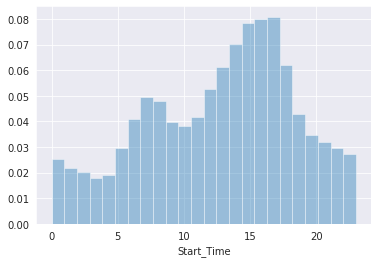

In [21]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

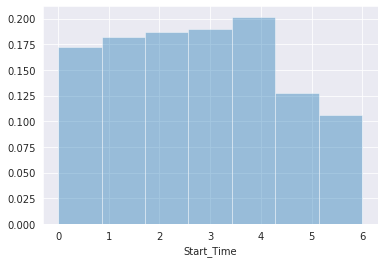

In [22]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

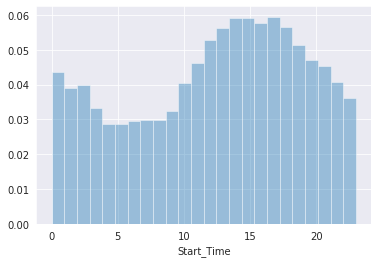

In [23]:
saturdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(saturdays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

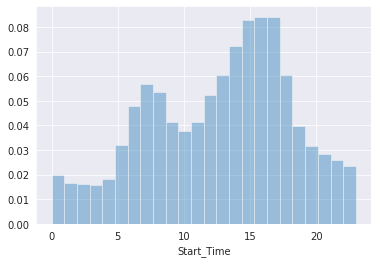

In [24]:
saturdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(saturdays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/home/decimal/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

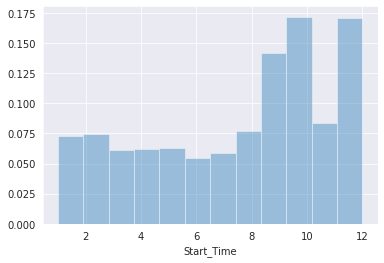

In [91]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

### Start Latitude and Longitude

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

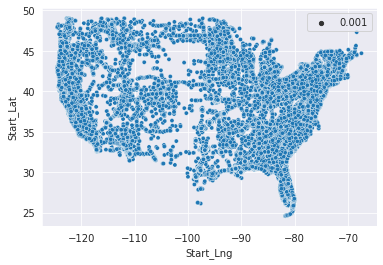

In [26]:
sample_df = df.sample(int(0.1 * len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [92]:
heatmap_df = df.sample(int(0.01 * len(df)))
heatmap_lat_lon = zip(list(heatmap_df.Start_Lat), list(heatmap_df.Start_Lng))

In [93]:
map = folium.Map()
HeatMap(heatmap_lat_lon).add_to(map)
map

## Questions
##### 1. Which top 25 cities have the highest number of accidents?
##### 2. What time of day are accidents most frequent?
##### 3. Which month have the most accidents?
##### 4. What is the trend of accidents year over year (descreasing/increasing)?
##### 5. Is the distribution of accidents by hour the same on weekends as on weekdays?

## Summary and Conclusion
### Insights:
##### The number of accidents in cities increases exponentially
##### Less than 3% cities have more than 1500 accidents
##### Over 1100 cities have reported only one accident
##### Most accidents happen between 1 pm to 7 pm
##### On Saturdays the peek hour is form 12 noon to 10 pm
##### Much data missing for 2020. Maybe even for 2016.
##### More than 170000 accidents happened on a clear weather

## Areas for future work
##### Looking at the population of Cities and States with most accidents
##### Finding reason of accidents by looking at weather conditions, temprature, visibility, humidity, etc.
##### Finding how much is the traffic in areas with most accidents